# Изучение рынка заведений общественного питания Москвы

- Автор: Косарева Алина
- Дата: 04.07 - 06.07.2025

### Цели и задачи проекта

Цель: провести исследовательский анализ рынка заведений общественного питания в Москве для выявления ключевых трендов, которые помогут инвесторам разработать оптимальную концепцию нового заведения.

Необходимо понять:

- какие форматы заведений наиболее популярны,
- в каких районах города наблюдается наибольшая концентрация точек,
- какие категории получают высокие оценки от пользователей,
- как связаны между собой такие параметры, как рейтинг, количество посадочных мест, цена и принадлежность к сети

Задачи:

1. Ознакомиться с данными (просмотреть данные из двух датасетов, проверить их объём, пропуски и корректность типов, объединить таблицы)
2. Предобработка данных (привести данные к нужным типам, обработать пропуски, убрать дубликаты, создать новый столбец is_24_7)
3. Исследовательский анализ (определить категори заведений, изучить расположение, выявить сетевые заведения, изучить кол-во посадочных мест, оценить рейтинги заведений, изучить корреляции данных, выявить топ-15 сетей и их средние рейтинги, сравнить средние чеки мест)
4. Сформировать выводы и рекомендации по работе

### Описание данных

Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` — информация о среднем чеке в заведениях общественного питания.

Описание датасета `rest_info`:

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
`0` — заведение не является сетевым;
`1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Описание датасета `rest_price`:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 686 kB 2.3 MB/s eta 0:00:01


In [2]:
df_rest = pd.read_csv('/datasets/rest_info.csv')
df_price = pd.read_csv('/datasets/rest_price.csv')

Предварительное ознакомление с датасетом `df_rest`:

In [3]:
df_rest.info()
df_rest.shape
df_rest.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0


Предварительное ознакомление с датасетом `df_price`

In [4]:
df_price.info()
df_price.shape
df_price.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0


---

### Промежуточный вывод


1. В работе два датасета: `df_rest` (содержит 8406 строк и информацию о заведениях) и `df_price` (содержит 4058 строк с данными о ценах и среднем чеке).


2. Форматы данных в целом соответствуют описанию. Критичных проблем с типами не обнаружено: в `df_rest` можно дополнительно привести `seats` к целому числу, а `category` и `district` — к категориальному типу.


3. Пропуски есть в обоих датасетах:

- В `df_rest` больше всего пропусков в столбцах `hours` и `seats`.
- В `df_price` особенно много пропусков в `middle_coffee_cup`.

4. Особенности для дальнейшей работы:

- Данные о ценах есть только у части заведений — это стоит учесть при анализе.
- Столбец `hours` требует отдельного анализа для выделения признака круглосуточности.

### Подготовка единого датафрейма



In [5]:
df = df_rest.merge(df_price, how='left', on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных


Приводим столбцы `district` и `category` к категоральному типу, а `seats` - к целочисленному. 

In [6]:
df['district'] = df['district'].astype('category')
df['category'] = df['category'].astype('category')
df['seats'] = df['seats'].astype('Int64')

df.dtypes

id                     object
name                   object
category             category
address                object
district             category
hours                  object
rating                float64
chain                   int64
seats                   Int64
price                  object
avg_bill               object
middle_avg_bill       float64
middle_coffee_cup     float64
dtype: object

In [7]:
print(f"Всего пропущенных значений:{df.isna().sum().sum()}")

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isna().sum().sum()
missing_percent = total_missing / total_cells * 100

print(f"Процент пропущенных значений: {missing_percent:.2f}%")

Всего пропущенных значений:26956
Процент пропущенных значений: 24.67%


In [8]:
na_df = pd.DataFrame(round(df.isna().mean() * 100, 2), columns=['missing_%'])

na_df_sorted = na_df.sort_values(by='missing_%', ascending=False)

na_df_sorted.style.background_gradient('coolwarm')

,missing_%
middle_coffee_cup,93.640000
middle_avg_bill,62.540000
price,60.560000
avg_bill,54.600000
seats,42.960000
hours,6.380000
id,0.000000
name,0.000000
category,0.000000
address,0.000000


1. Стоимость средней чашки капучино редко указывается заведениями, кроме того не во всех заведениях его подают. По этой причине в этом столбце наибольшее кол-во пропусков.
2. Столбец `middle_avg_bill` производный: если avg_bill не начинается с "cредний счёт", то сюда ничего не попадает.
3. В столбце `price` много пропусков из-за возможного отсуствия явной классификации в карточке заведения.
4. В столбце `avg_bill` возможны пропуски из-за того, что заведение намеренно не внесло средний счет.
5. Информация в столбце `seats` не обязательна и часто отсутствует в карточке заведения, к тому же многие заведения могут работать в концепции "take away".
6. В столбце `hours`заведение могло не указывать часы в Картах, оно закрыто или временно не работает. 
Из-за большого кол-ва пропусков стоит их оставить нетронутыми и продолжить работу с их учетом.

In [9]:
print(df['district'].unique())
print(df['district'].nunique())

['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']
Categories (9, object): ['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', ..., 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']
9


In [10]:
print(df['name'].str.lower().unique())
print(df['name'].str.lower().nunique())

['wowфли' 'четыре комнаты' 'хазри' ... 'миславнес' 'самовар' 'kebab time']
5512


In [11]:
print(df['category'].unique())
print(df['category'].nunique())

['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Categories (8, object): ['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
8


Проверяем наличие неявных дубликатов:

In [12]:
duplicates_subset = df.duplicated(subset=['district', 'name', 'category'])
print(f"Дубликаты по ключевым столбцам: {duplicates_subset.sum()}")

Дубликаты по ключевым столбцам: 1437


In [13]:
df = df.drop_duplicates(subset=['district', 'name', 'category'], keep='first')
df.duplicated().sum()

0

In [14]:
first_count = 8406
final_count = df.shape[0]
a_count = first_count - final_count 
r_count = (a_count / first_count)*100

print(f'Всего удалено строк: {a_count}')
print(f'Относительное значение удаленных строк: {r_count}')

Всего удалено строк: 1437
Относительное значение удаленных строк: 17.094932191291935


In [15]:
df['is_24_7'] = df['hours'].str.lower().str.strip().str.contains('круглосуточно|24/7|00:00–23:59', na=False)

Добавлен столбец-индикатор того, что заведение работает круглосуточно. Проверяем:

In [16]:
df[df['is_24_7'] == True][['name', 'hours']].head(3)

,name,hours
10,Great Room Bar,"ежедневно, круглосуточно"
17,Чайхана Беш-Бармак,"ежедневно, круглосуточно"
19,Пекарня,"ежедневно, круглосуточно"


---

### Промежуточный вывод


Неявных дубликатов при изучении уникальных значений не выявлено. Стоит отметить, что среди категорий заведений "бар, паб" находятся в одной категории. Принято решение не разделять на две разные, поскольку это исказить рез-ты анализа в дальнейшем (одно заведение будет подсчитываться дважды).

Было обнаружено 1437 дублирующихся строк, или 17%. Эти дубликаты удалены с сохранением первой записи.

## 3. Исследовательский анализ данных


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

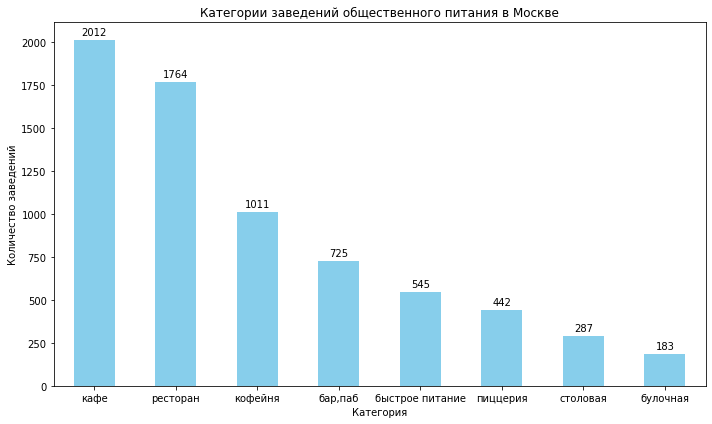

In [17]:
group = df['category'].value_counts().sort_values(ascending=False)

ax = group.plot.bar(
    title ='Категории заведений общественного питания в Москве',
    xlabel = 'Категория',
    ylabel = 'Количество заведений',
    rot = 0,
    color = 'skyblue',
    figsize=(10,6)
)

xs = range(len(group))
ys = group.values

for x, y in zip(xs, ys):
    label = f"{y}"
    ax.annotate(label,
                (x, y),
                textcoords="offset points",
                xytext=(0, 5),  
                ha='center')

plt.tight_layout()
plt.show()

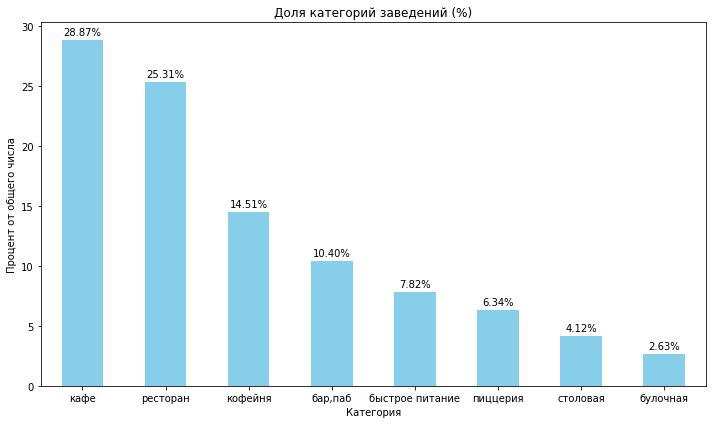

In [18]:
group_rel = df['category'].value_counts(normalize=True).sort_values(ascending=False) * 100  

ax = group_rel.plot.bar(
    title='Доля категорий заведений (%)',
    xlabel='Категория',
    ylabel='Процент от общего числа',
    color='skyblue',
    rot=0,
    figsize=(10,6)
)

xs = range(len(group_rel))
ys = group_rel.values

for x, y in zip(xs, ys):
    label = f"{y:.2f}%"
    ax.annotate(label,
                (x, y),
                textcoords="offset points",
                xytext=(0, 5),  
                ha='center')

plt.tight_layout()
plt.show()

В Москве преобладают кафе и рестораны - более 1500 точек (более 20%). Меньше всего представлены булочные (менее 250 точек, или 5%) и столовые. Таким образом, рынок общественного питания сосредоточен преимущественно в сегменте кафе, ресторанов и кофеен.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

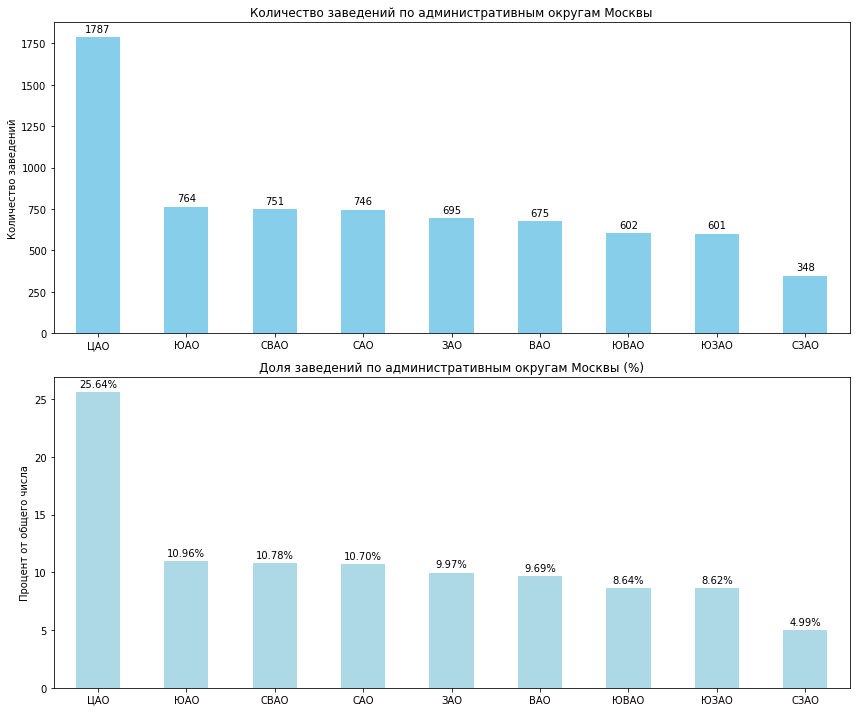

In [19]:
new_district = {
    'Центральный административный округ': 'ЦАО',
    'Северный административный округ': 'САО',
    'Северо-Восточный административный округ': 'СВАО',
    'Восточный административный округ': 'ВАО',
    'Юго-Восточный административный округ': 'ЮВАО',
    'Южный административный округ': 'ЮАО',
    'Юго-Западный административный округ': 'ЮЗАО',
    'Западный административный округ': 'ЗАО',
    'Северо-Западный административный округ': 'СЗАО',
}

df['district'] = df['district'].replace(new_district)

district_total = df['district'].value_counts().sort_values(ascending=False)
district_ratio = df['district'].value_counts(normalize=True).sort_values(ascending=False) * 100

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

district_total.plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Количество заведений по административным округам Москвы')
axs[0].set_ylabel('Количество заведений')
axs[0].set_xticklabels(district_total.index, rotation=0)

for x, y in enumerate(district_total.values):
    axs[0].annotate(f'{y}', (x, y),
                    textcoords="offset points",
                    xytext=(0, 5),
                    ha='center')

district_ratio.plot(kind='bar', color='lightblue', ax=axs[1])
axs[1].set_title('Доля заведений по административным округам Москвы (%)')
axs[1].set_ylabel('Процент от общего числа')
axs[1].set_xticklabels(district_ratio.index, rotation=0)

for x, y in enumerate(district_ratio.values):
    axs[1].annotate(f'{y:.2f}%', (x, y),
                    textcoords="offset points",
                    xytext=(0, 5),
                    ha='center')

plt.tight_layout()
plt.show()

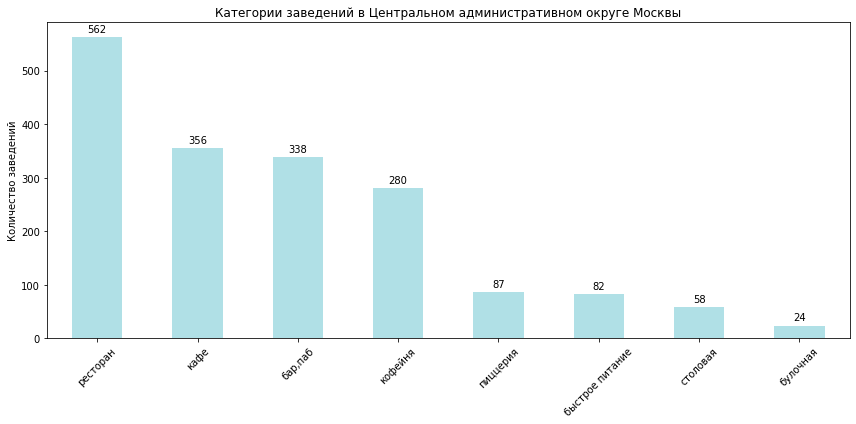

In [20]:
cao = df[df['district'] == 'ЦАО']
cao_category = cao['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = cao_category.plot(kind='bar', color='powderblue')
plt.title('Категории заведений в Центральном административном округе Москвы')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)

for x, y in enumerate(cao_category.values):
    ax.annotate(f'{y}',
                (x, y),
                textcoords="offset points",
                xytext=(0, 5),
                ha='center')

plt.tight_layout()
plt.show()

В данных представлено 9 из 12 округов Москвы (не представлены: Зеленоградский, Новомосковский и Троицкий). Наибольшее кол-во заведений в Центральном административном округе - более 1750 заведений (26,67%). Среди них большая часть приходится на рестораны и кафе. Кол-во баров/ пабов и кофейн приближается к кол-ву кафе. 

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

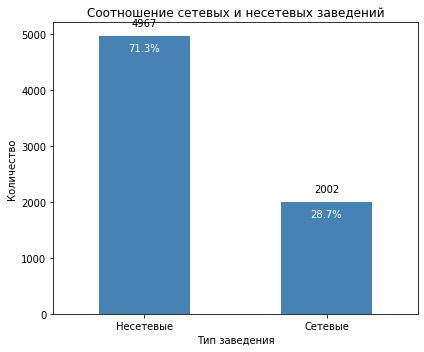

In [21]:
chain_counts = df['chain'].value_counts()
chain_ratio = df['chain'].value_counts(normalize=True) * 100  

plt.figure(figsize=(6, 5))
ax = chain_counts.plot(kind='bar', color=['steelblue'])

plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество')

plt.xticks(ticks=[0, 1], labels=['Несетевые', 'Сетевые'], rotation=0)

for x, (count, ratio) in enumerate(zip(chain_counts.values, chain_ratio.values)):
    ax.annotate(f'{count}',              
                (x, count),
                textcoords="offset points",
                xytext=(0, 10),
                ha='center',
                fontsize=10,
                )

    ax.annotate(f'{ratio:.1f}%',        
                (x, count),
                textcoords="offset points",
                xytext=(0, -15),
                ha='center',
                fontsize=10,
                color='white')

plt.tight_layout()
plt.show()

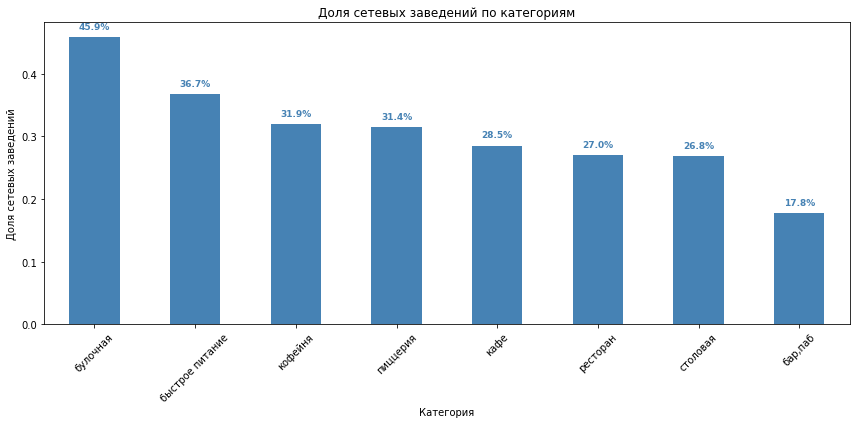

In [22]:
chain_ratio = df.groupby('category')['chain'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = chain_ratio.plot(
    kind='bar',
    color='steelblue'
)

plt.title('Доля сетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Доля сетевых заведений')
plt.xticks(rotation=45)
plt.grid(False)

for x, y in enumerate(chain_ratio.values):
    ax.annotate(f'{y:.1%}',          
                (x, y),
                textcoords="offset points",
                xytext=(0, 8),    
                ha='center',
                fontsize=9,
                fontweight='bold',
                color='steelblue')

plt.tight_layout()
plt.show()

Несетевые точки преобладают в разрезе общего кол-ва заведений общественного питания. Их около 5 тыс. Сетевых заведений в два раза меньше (около 2 тыс.). Среди сетевых точек доминируют булочные (более 45%) и места быстрого питания (~ 37%). Меньше всего сетей среди категории "бары\ пабы" (менее 20%). 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


<AxesSubplot:>

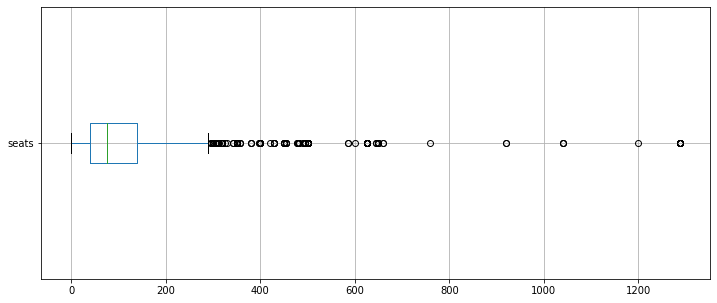

In [23]:
df.boxplot(column='seats', vert=False, figsize =(12, 5))

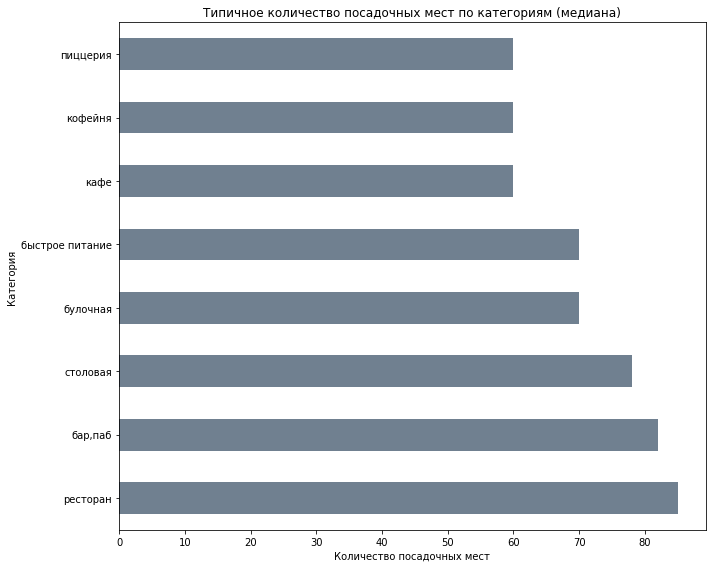

In [24]:
category_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)

category_seats.plot(
    kind='barh',
    figsize=(10, 8),
    color='slategray',
    title='Типичное количество посадочных мест по категориям (медиана)'
)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория')

plt.tight_layout()
plt.show()

Большинство значений, судя по ящику с усами, находятся ниже 300. Наблюдаются единичные выбросы выше 600, доходящие до 1300+, что является редким ялвением для большинства типов заведений. 


Причины аномальных значений: большие гастропространства или фудкорты в ТЦ, где посадочные места считаются на несколько заведений. Это также могут быть банкетные залы и рестораны. Не исключен человеческий фактор при вводе данных.


Межквартильный размах находится приблизительно между 50 и 150 посадочных мест, что говорит о типичном диапазоне вместимости.

Если рассматривать по категориям, то большее кол-во мест приходится на рестораны, что типично для данного типа заведения. В барах/ пабах учитываются места за барной стойкой или имеется более компактное расположение, вследствие чего помещается большее кол-во людей.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

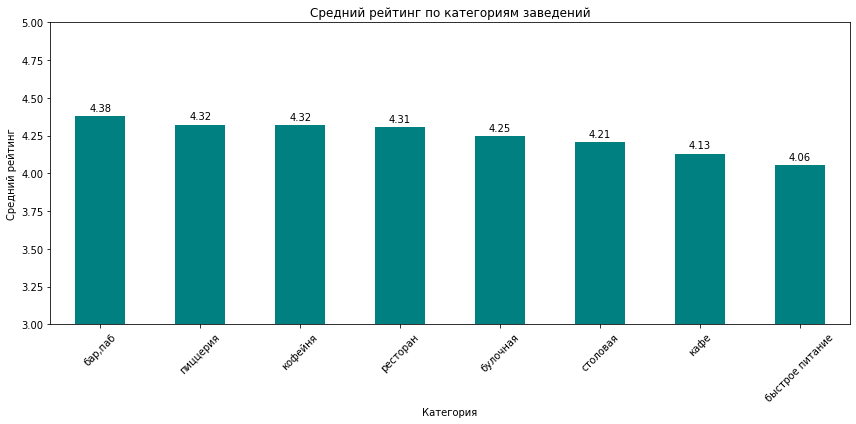

In [25]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = avg_rating.plot(kind='bar', color='teal')

plt.title('Средний рейтинг по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)

plt.ylim(3, 5)

for x, y in enumerate(avg_rating.values):
    ax.annotate(f'{y:.2f}',
                (x, y),
                textcoords='offset points',
                xytext=(0, 5),
                ha='center',
                fontsize=10)

plt.tight_layout()
plt.show()

Самый низкий средний рейтинг у точек быстрого питания, самый высокий - у баров/ пабов. При этом распределение наблюдается в диапазоне от 4.05 до 4.35 и выше, что само по себе говорит о неплохой оценке заведения. Тем не менее, низкие оценки точек быстрого питания могут быть вызваны высокой посещаемостью, что влечет больше критики. Самообслуживание и минимальный сервис также сказываются на оценке. В то же время у баров/ пабов более высокие рейтинги характеризуются продуманной атмосферой и меньшим объемом посетителей. 

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'chain', 'seats']


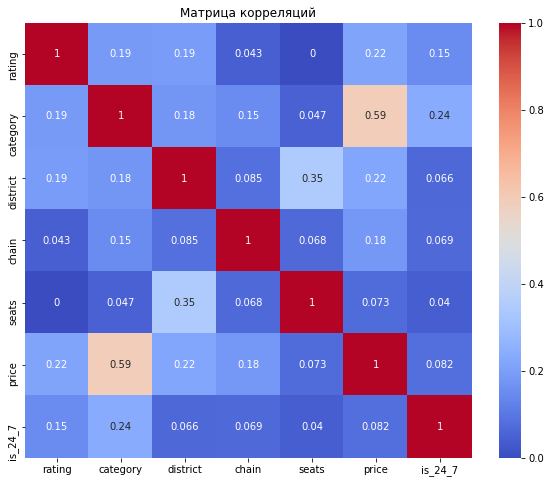

In [26]:
phik_corr = df[['rating','category','district','chain','seats','price', 'is_24_7']].phik_matrix()

plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

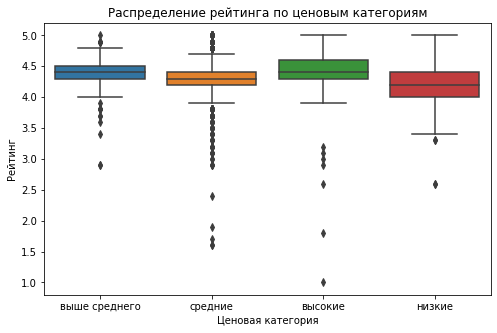

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='price', y='rating', data=df)
plt.title('Распределение рейтинга по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')
plt.show()

Между `price` и `rating` наблюдается слабая связь (0.22). Тут можно говорить о косвенном влиянии. Места с более высокими ценами получают оценки чуть выше. Очевидно, что дело не в самих ценах, а в более высоком уровне сервиса и качества блюд.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

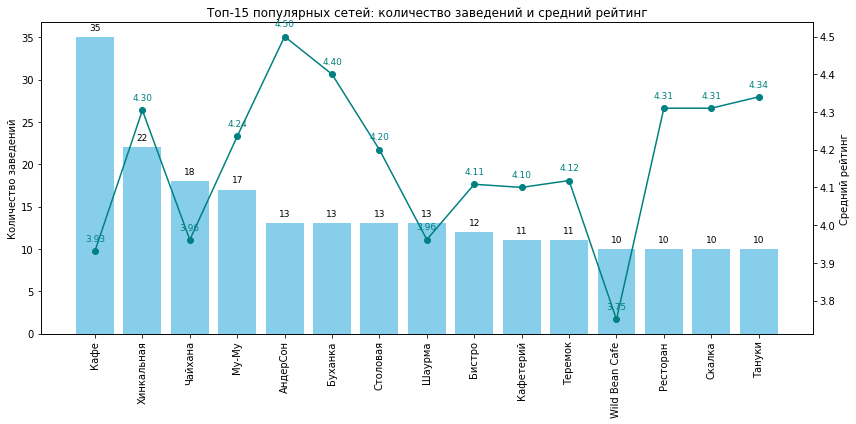

In [28]:
# Выводим топ-15
counts = df['name'].value_counts()

top15_names = counts.head(15).index

avg_ratings = df[df['name'].isin(top15_names)].groupby('name')['rating'].mean()

result = pd.DataFrame({
    'Количество заведений': counts[top15_names],
    'Средний рейтинг': avg_ratings
})

result = result.sort_values(by='Количество заведений', ascending=False)

# Строим комбинированный график
fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(result.index, result['Количество заведений'], color='skyblue')
ax1.set_ylabel('Количество заведений')
ax1.set_title('Топ-15 популярных сетей: количество заведений и средний рейтинг')
ax1.tick_params(axis='x', rotation=90)

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 fontsize=9)
    
ax2 = ax1.twinx()
ax2.plot(result.index, result['Средний рейтинг'], color='teal', marker='o')
ax2.set_ylabel('Средний рейтинг')

for x, y in enumerate(result['Средний рейтинг']):
    ax2.annotate(f'{y:.2f}',
                 xy=(x, y),
                 xytext=(0, 8),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 fontsize=9,
                 color='teal')

plt.tight_layout()
plt.show()

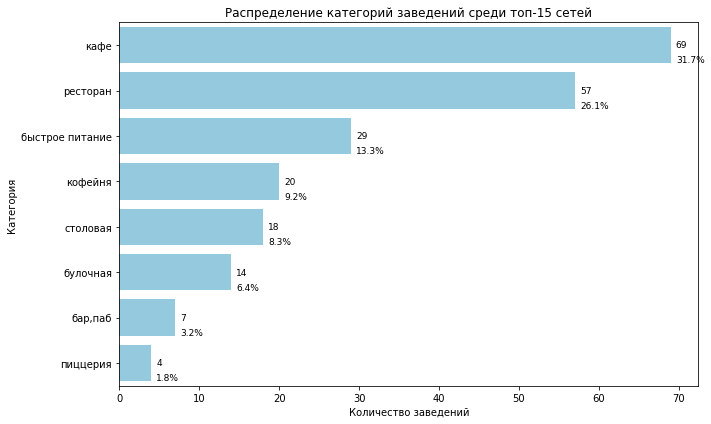

In [35]:
top15_df = df[df['name'].isin(top15_names)]

category_counts = top15_df['category'].value_counts().sort_values(ascending=False)
category_ratio = (category_counts / category_counts.sum()) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=category_counts.values,
    y=category_counts.index,
    color='skyblue',
    order=category_counts.index 
)

plt.title('Распределение категорий заведений среди топ-15 сетей')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')

for i, (count, ratio) in enumerate(zip(category_counts.values, category_ratio.values)):
    ax.annotate(f'{count}',            
                xy=(count, i),
                xytext=(5, 0),
                textcoords='offset points',
                va='center',
                ha='left',
                fontsize=9)
    
    ax.annotate(f'{ratio:.1f}%',      
                xy=(count, i),
                xytext=(5, -15),
                textcoords='offset points',
                va='center',
                ha='left',
                fontsize=9)

plt.tight_layout()
plt.show()

Изучены топ-15 сетей по кол-ву заведений. Наиболее крупные сети - "Кафе", "Хинкальная" и "Чайхана". Большая часть крупных сетевых заведений представляют собой кафе (более 60), рестораны (около 50) или точки фастфуда. Рейтинг варьируется от 3.6 до 4.4.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


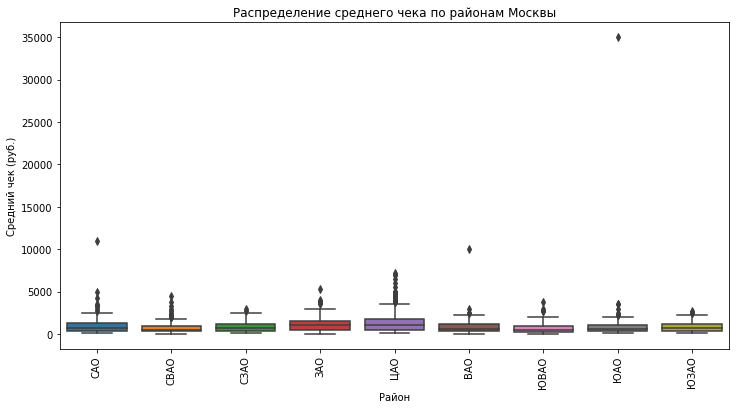

In [30]:
check = df[['district', 'middle_avg_bill']].dropna()

plt.figure(figsize=(12,6))
sns.boxplot(x='district', y='middle_avg_bill', data=check)
plt.xticks(rotation=90)
plt.title('Распределение среднего чека по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек (руб.)')
plt.show()

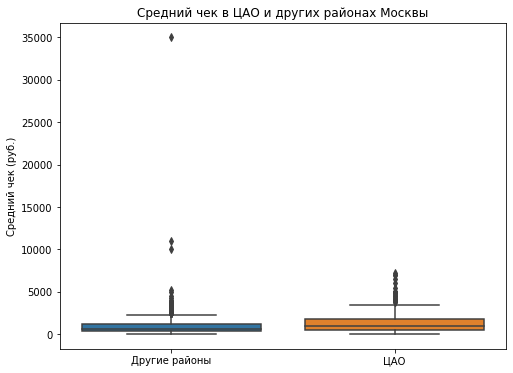

is_CAO
Другие районы     866.554477
ЦАО              1252.289504
Name: middle_avg_bill, dtype: float64


In [31]:
data = df[['district', 'middle_avg_bill']].dropna()

data['is_CAO'] = data['district'].str.contains('ЦАО')

data['is_CAO'] = data['is_CAO'].replace({True: 'ЦАО', False: 'Другие районы'})

plt.figure(figsize=(8,6))
sns.boxplot(x='is_CAO', y='middle_avg_bill', data=data)
plt.title('Средний чек в ЦАО и других районах Москвы')
plt.ylabel('Средний чек (руб.)')
plt.xlabel('')
plt.show()

print(data.groupby('is_CAO')['middle_avg_bill'].mean())

Средний чек всех округов находится в диапазоне до 5000 руб. Однако встречаются единичные выбросы с Северном, Восточном - около 10 тыс. - и Южном (35 тыс) округах. В ЦАО чек варьируется до 10 тыс. без аномальных выбросов. 

---

### Промежуточный вывод


1. Наибольшее число точек приходится на кафе, рестораны и кофейни. Рынок сконцентрирован в среднем и среднем+ ценовом сегменте.
2. В выборке представлены 9 из 12 округов Москвы. ЦАО — лидер по количеству заведений (более 1750), особенно кафе, ресторанов и баров, что типично для центра.
3. Несетевые заведения преобладают — около 5 тыс. точек против 2 тыс. сетевых. Среди сетевых по количеству лидируют булочные и точки фастфуда, что характерно для форматов с франшизой. Однако при рассмотрении в разрезе рейтинга, в топ-15-ти сетевых точек преобладают кафе, рестораны и фастфуд, что обусловлено их масштабностью. 
4. Большинство заведений вмещает 50–150 человек, а основной диапазон среднего чека — до 5000 руб. Однако в некоторых округах (ЮАО, СВАО) есть выбросы до 10–35 тыс. руб, вероятно, из-за элитных ресторанов.

## 4. Итоговый вывод и рекомендации


В рамках исследовательского анализа были изучены данные о заведениях общественного питания в Москве: их категории, география, тип (сетевые/несетевые), средний рейтинг, посадочные места и ценовой сегмент. Были построены соответсвующие визуализации.

Была проделана следующая работа:
- изучено содержимое датасетов (кол-во строк, столбцов, типы данных), объеденены датасеты
- данные нормализованы и преобразованы в более удобные для работы форматы
- выявлены пропуски: 24.67% на весь датасет, большая часть которых в столбцах со средними ценами.
- данные очищены от явных и неявных дубликатов. Было обнаружено 1437 неявных дубликата.
- исследованы различные стороны общесвенного питания в Москве (популярные заведения, средний чек, сетевые компании, кол-во посадочных мест и т.п.)
- выделены топ-15 сетей питания по кол-ву заведений и рейтингу
- представлены краткие выводы по итогам каждого шага в разделе исследовательского анализа
- выделены самые важные рез-ты в промежуточном выводе

Главные выводы:
Рынок сконцентрирован вокруг кафе, ресторанов и кофеен. Центральный административный округ (ЦАО) — лидер по количеству заведений. Несетевые заведения преобладают количественно, однако в топ-15 в популярных брендов входят преимущественно сетевые заведения. Рейтинг заведений стабильно высокий: основная масса оценок находится в диапазоне 4.0–4.4. Бары получают более высокие оценки по сравнению с другими категориями. 

Рекомендации:
1. Изучить спрос в непредставленных трех округах (Зеленоградский, Новомосковский, Троицкий). 
2. Ориентироваться на открытие кафе и ресторанов в популярных районах из-за высокого трафика.
3. При открытии заведения фокусироваться на качестве сервиса и атмосфере, что влияет на общий рейтинг места.
4. При выборе формата учитывать оптимальную вместимость (оптимально от 50 до 150 мест).
5. Более подробно сфокусироваться на исследовании корреляции различных критериев заведения с целью выявления дополнительных закономерностей.